# Análisis exploratorio de series temporales
A partir de los valores diarios de temperatura desde 1981 hasta 1990 realiza lo siguiente:
1. Transforma la columna con la información temporal usando pd.to_datetime()
2. Representa todo el histórico disponible.
3. Representa un año completo de datos para ver la evolución anual con más detalle.
4. Obtén las estadísticas más representativas del conjunto de datos con el método describe de pandas.
5. Utiliza las propiedades del seno y del coseno para crear nuevas características que reflejen el momento del año.
6. Representa estas características a lo largo del período de un año para comprobar que realmente cada día tiene una combinación de valores de seno y coseno únicas.
7. Divide el histórico en tres conjuntos distintos de entrenamiento, validación y test con un tamaño del 70%, 20% y 10% respectivamente.
8. Normaliza el conjunto de datos.
9. Representa el conjunto de datos en un gráfico como un histógrama o violinplot para comprobar que se han normalizado los datos.
10. Crea un modelo single step, donde a partir de la temperatura de los últimos siete días somos capaces de estimar la temperatura del día siguiente. Puedes utilizar DNN o CNN. Tantas capas intermedias como crees oportuno. Recuerda que necesitas la clase WindowGenerator.
11. Crea un modelo multi step, donde a partir de la temperatura de los últimos 28 días, estimamos la temperatura de los siete siguientes. Utiliza DNN o CNN así como LSTM.
12. Representa en un gráfico de barras la precisión de cada una de las aproximación (MAE, por ejemplo) de los puntos 10 y 11.

In [1]:
# Librerías que vamos utilizar durante el ejercicio
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

# Configuración general de las figuras que representaremos
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

C:\Users\Adri\AppData\Local\Temp\ipykernel_1456\1053684271.py:10: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Importamos los datos
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


1. Transforma la columna con la información temporal usando pd.to_datetime()

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

2. Representa todo el histórico disponible.

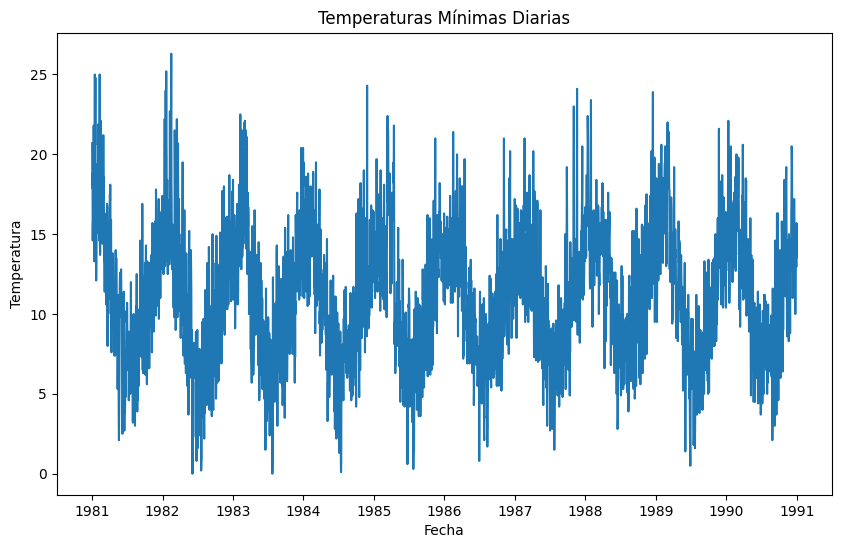

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Temp'])
plt.title('Temperaturas Mínimas Diarias')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.show()

3. Representa un año completo de datos para ver la evolución anual con más detalle.

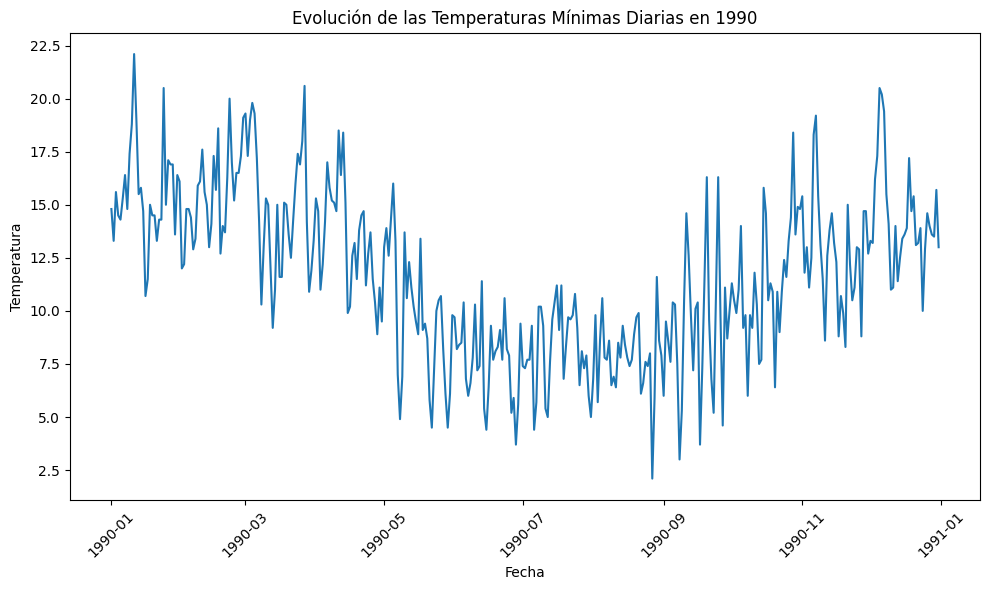

In [5]:
df_1990 = df.loc['1990']

plt.figure(figsize=(10, 6))
plt.plot(df_1990.index, df_1990['Temp'])
plt.title('Evolución de las Temperaturas Mínimas Diarias en 1990')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


4. Obtén las estadísticas más representativas del conjunto de datos con el método describe de pandas.

In [6]:
stats = df['Temp'].describe()
print(stats)
count = stats['count']
mean = stats['mean']
std = stats['std']
min = stats['min']

count    3650.000000
mean       11.177753
std         4.071837
min         0.000000
25%         8.300000
50%        11.000000
75%        14.000000
max        26.300000
Name: Temp, dtype: float64


5. Utiliza las propiedades del seno y del coseno para crear nuevas características que reflejen el momento del año.

In [7]:
df['DayOfYear'] = df.index.dayofyear

df['Sin_DayOfYear'] = np.sin(2 * np.pi * df['DayOfYear'] / 365.25)
df['Cos_DayOfYear'] = np.cos(2 * np.pi * df['DayOfYear'] / 365.25)

print(df.head())

            Temp  DayOfYear  Sin_DayOfYear  Cos_DayOfYear
Date                                                     
1981-01-01  20.7          1       0.017202       0.999852
1981-01-02  17.9          2       0.034398       0.999408
1981-01-03  18.8          3       0.051584       0.998669
1981-01-04  14.6          4       0.068755       0.997634
1981-01-05  15.8          5       0.085906       0.996303


In [8]:
df

,Temp,DayOfYear,Sin_DayOfYear,Cos_DayOfYear
Date,,,,
1981-01-01,20.7,1,0.017202,0.999852
1981-01-02,17.9,2,0.034398,0.999408
1981-01-03,18.8,3,0.051584,0.998669
1981-01-04,14.6,4,0.068755,0.997634
1981-01-05,15.8,5,0.085906,0.996303
...,...,...,...,...
1990-12-27,14.0,361,-0.073045,0.997329
1990-12-28,13.6,362,-0.055879,0.998438
1990-12-29,13.5,363,-0.038696,0.999251


6. Representa estas características a lo largo del período de un año para comprobar que realmente cada día tiene una combinación de valores de seno y coseno únicas.

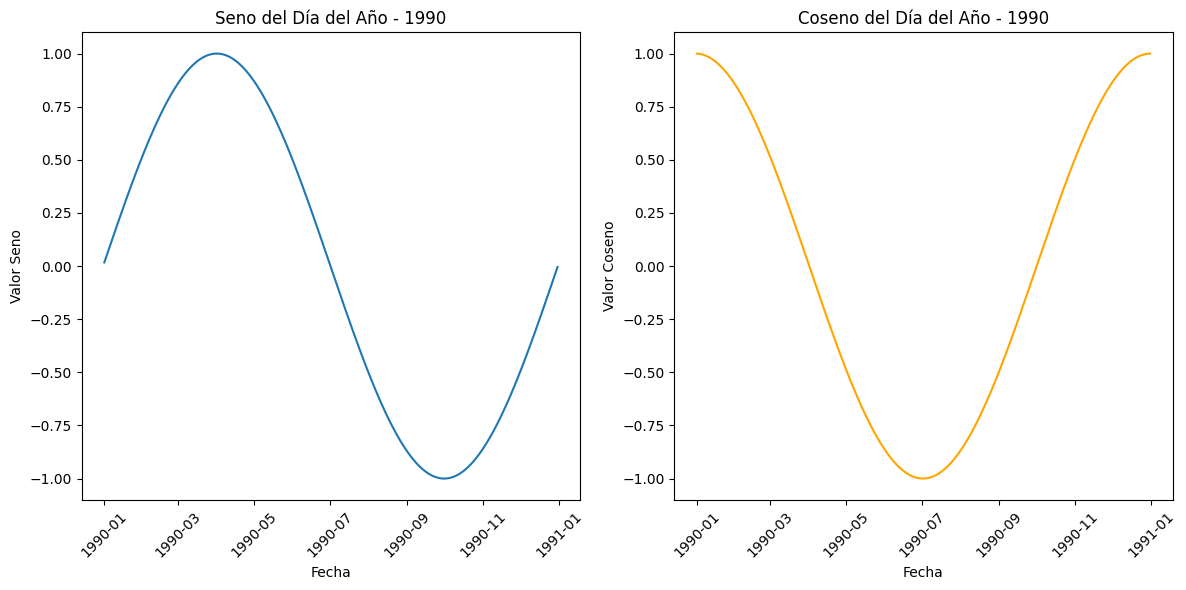

In [9]:
df_1990 = df.loc['1990']
plt.figure(figsize=(12, 6))

# Seno
plt.subplot(1, 2, 1)
plt.plot(df_1990.index, df_1990['Sin_DayOfYear'], label='Seno del día del año')
plt.title('Seno del Día del Año - 1990')
plt.xlabel('Fecha')
plt.ylabel('Valor Seno')
plt.xticks(rotation=45)

# Coseno
plt.subplot(1, 2, 2)
plt.plot(df_1990.index, df_1990['Cos_DayOfYear'], label='Coseno del día del año', color='orange')
plt.title('Coseno del Día del Año - 1990')
plt.xlabel('Fecha')
plt.ylabel('Valor Coseno')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

7. Divide el histórico en tres conjuntos distintos de entrenamiento, validación y test con un tamaño del 70%, 20% y 10% respectivamente.

In [10]:
# Calcular los tamaños de cada conjunto
total_size = len(df)
train_size = int(total_size * 0.7)
val_size = int(total_size * 0.2)

# Calcular el índice para el final del conjunto de entrenamiento y el final del conjunto de validación
final_train_index = train_size
final_val_index = train_size + val_size

# Dividir el DataFrame
df_train = df[:final_train_index]
df_val = df[final_train_index:final_val_index]
df_test = df[final_val_index:]

print(f"Tamaño del conjunto de entrenamiento: {len(df_train)}")
print(f"Tamaño del conjunto de validación: {len(df_val)}")
print(f"Tamaño del conjunto de test: {len(df_test)}")

Tamaño del conjunto de entrenamiento: 2555
Tamaño del conjunto de validación: 730
Tamaño del conjunto de test: 365


8. Normaliza el conjunto de datos.

In [11]:
mean = df_train.mean()
std = df_train.std()

train_df = (df_train - mean) / std
val_df = (df_val - mean) / std
test_df = (df_test - mean) / std

print(train_df.head())


                Temp  DayOfYear  Sin_DayOfYear  Cos_DayOfYear
Date                                                         
1981-01-01  2.376632  -1.726974       0.024320       1.415181
1981-01-02  1.691865  -1.717485       0.048626       1.414554
1981-01-03  1.911969  -1.707996       0.072918       1.413508
1981-01-04  0.884818  -1.698507       0.097189       1.412044
1981-01-05  1.178290  -1.689018       0.121430       1.410162


9. Representa el conjunto de datos en un gráfico como un histograma o violinplot para comprobar que se han normalizado los datos.

- Histograma

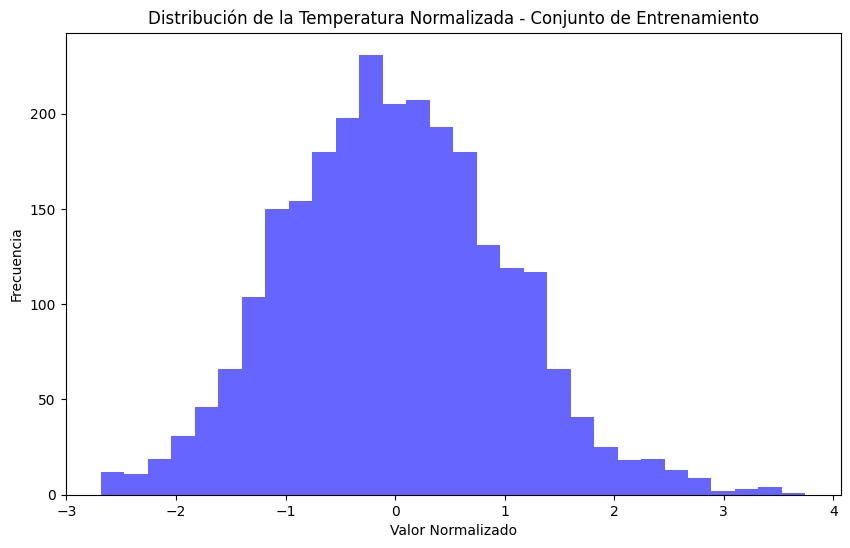

In [12]:
import matplotlib.pyplot as plt

# Representar la característica 'Temp' del conjunto de entrenamiento normalizado como un histograma
plt.figure(figsize=(10, 6))
plt.hist(train_df['Temp'], bins=30, alpha=0.6, color='blue')
plt.title('Distribución de la Temperatura Normalizada - Conjunto de Entrenamiento')
plt.xlabel('Valor Normalizado')
plt.ylabel('Frecuencia')
plt.show()


- Violinplot

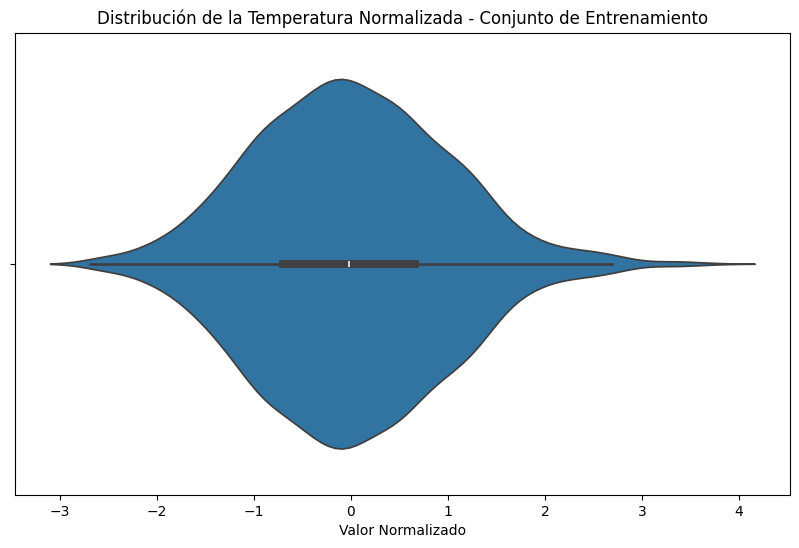

In [13]:
import seaborn as sns

# Representar la característica 'Temp' del conjunto de entrenamiento normalizado como un violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=train_df, x='Temp')
plt.title('Distribución de la Temperatura Normalizada - Conjunto de Entrenamiento')
plt.xlabel('Valor Normalizado')
plt.show()


In [14]:
df.head()

,Temp,DayOfYear,Sin_DayOfYear,Cos_DayOfYear
Date,,,,
1981-01-01,20.7,1,0.017202,0.999852
1981-01-02,17.9,2,0.034398,0.999408
1981-01-03,18.8,3,0.051584,0.998669
1981-01-04,14.6,4,0.068755,0.997634
1981-01-05,15.8,5,0.085906,0.996303


10. Crea un modelo single step, donde a partir de la temperatura de los últimos siete días somos capaces de estimar la temperatura del día siguiente. Puedes utilizar DNN o CNN. Tantas capas intermedias como crees oportuno. Recuerda que necesitas la clase WindowGenerator.

In [15]:
class WindowGenerator:
  def __init__(
      self,
      input_width: int,
      label_width: int,
      shift: int,
      train_df: pd.DataFrame =train_df,
      val_df: pd.DataFrame=val_df,
      test_df: pd.DataFrame=test_df,
      labels_columns: list[str] = None
    ) -> None:
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df
    self.labels_columns = labels_columns
    if labels_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(labels_columns)}

    self.column_indices = {name: i for i, name in enumerate(train_df.columns)}
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift
    self.total_window_size = input_width + shift
    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.labels_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self) -> str:
      return '\n'.join([
          f'Tamaño total de la ventana: {self.total_window_size}',
          f'Índices de entrada: {self.input_indices}',
          f'Índices de salida: {self.labels_indices}',
          f'Columnas de salida: {self.labels_columns}'
      ])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    if self.labels_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.labels_columns],
          axis=-1)
    return inputs, labels
  
  def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col} [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.labels_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.labels_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.labels_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)
      if n == 0:
        plt.legend()

    plt.xlabel('Time [h]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)
    ds = ds.map(self.split_window)
    return ds
  
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [16]:
single_step_window = WindowGenerator(
    input_width=7, # Usamos los últimos 7 días para hacer la predicción
    label_width=1, # Queremos predecir un solo día
    shift=1, # El día siguiente
    labels_columns=['Temp'])
single_step_window

Tamaño total de la ventana: 8
Índices de entrada: [0 1 2 3 4 5 6]
Índices de salida: [7]
Columnas de salida: ['Temp']

In [17]:
MAX_EPOCHS = 1
def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2,mode='min')
  model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])
  history = model.fit(window.train, epochs = MAX_EPOCHS, validation_data=window.val, callbacks=[early_stopping])
  return history

In [18]:
import tensorflow as tf

# DNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

history = compile_and_fit(model, single_step_window)
mae_single_step = history.history['mean_absolute_error'][-1]




80/80 [==============================] - 2s 6ms/step - loss: 0.6189 - mean_absolute_error: 0.6109 - val_loss: 0.4269 - val_mean_absolute_error: 0.5151


11. Crea un modelo multi step, donde a partir de la temperatura de los últimos 28 días, estimamos la temperatura de los siete siguientes. Utiliza DNN o CNN así como LSTM.

In [26]:
multi_step_window = WindowGenerator(
    input_width=7,  # Usamos los últimos 28 días como entrada
    label_width=7,   # Queremos predecir los siguientes 7 días
    shift=1,         # Desplazamiento de 7 días en el futuro
    labels_columns=['Temp'])

In [27]:
def build_lstm_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_absolute_error')
    return model

In [28]:
history = compile_and_fit(model, single_step_window)
mae_multi_step = history.history['mean_absolute_error'][-1]

80/80 [==============================] - 1s 7ms/step - loss: 0.4565 - mean_absolute_error: 0.5363 - val_loss: 0.4119 - val_mean_absolute_error: 0.5099


12. Representa en un gráfico de barras la precisión de cada una de las aproximación (MAE, por ejemplo) de los puntos 10 y 11.

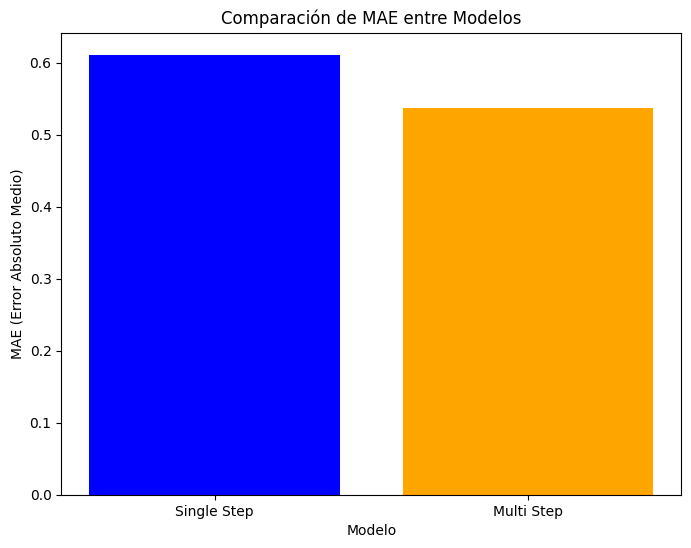

In [29]:
import matplotlib.pyplot as plt

# Nombres de los modelos
modelos = ['Single Step', 'Multi Step']

# Valores MAE
maes = [mae_single_step, mae_multi_step]

# Creando el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(modelos, maes, color=['blue', 'orange'])

# Añadiendo títulos y etiquetas
plt.title('Comparación de MAE entre Modelos')
plt.ylabel('MAE (Error Absoluto Medio)')
plt.xlabel('Modelo')
plt.xticks(modelos)

# Mostrando el gráfico
plt.show()